In [134]:
import pandas as pd
import numpy as np
import seaborn as sns

In [135]:
df_institutions = pd.read_csv(
    "../data/Most-Recent-Cohorts-Institution.csv.gz",
    usecols=[
        "OPEID6",  # integer educational institution ID
        "INSTNM",  # institution name (string)
        "CITY",  # institution's city
        "STABBR",  # state abbreviation
        "FTFTPCTPELL",  # percentage of Pell grant recipients
        "TUITIONFEE_IN",  # in-state tuition (float)
        "TUITIONFEE_OUT",  # out of state tuition (float)
        "ADM_RATE",  # admission rate
        "NPT4_PUB",  # net price for public institutions (NaN for private)
        "NPT4_PRIV",  # net price for private institutions (NaN for public)
        "NPT41_PUB",  # mean price paid by lowest income bracket (NaN for private)
        "NPT41_PRIV",  # mean price paid by lowest income bracket (NaN for public)
        "NPT45_PUB",  # mean price paid by highest income bracket (NaN for private)
        "NPT45_PRIV",  # mean price paid by highest income bracket (NaN for public)
        "MD_EARN_WNE_P10",  # median income for graduates 10 years following graduation
        "C100_4",  # completion rates after 4 years
    ],
    engine="pyarrow",
)
df_fields_of_study = pd.read_csv(
    "../data/FieldOfStudyData1718_1819_PP.csv.gz",
    usecols=[
        "OPEID6",  # integer educational institution ID
        "INSTNM",  # institution name (string)
        "CREDDESC",  # degree being offered (string)
        "CIPDESC",  # education program (string)
        "CONTROL",  # type of institution (e.g. "Public")
    ],
)

In [136]:
df_institutions.head()

,OPEID6,INSTNM,CITY,STABBR,FTFTPCTPELL,TUITIONFEE_IN,TUITIONFEE_OUT,ADM_RATE,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT41_PRIV,NPT45_PUB,NPT45_PRIV,MD_EARN_WNE_P10,C100_4
0,1002,Alabama A & M University,Normal,AL,0.6925,10024.0,18634.0,0.8965,15529.0,NaN,14694.0,NaN,20483.0,NaN,36339.0,0.1052
1,1052,University of Alabama at Birmingham,Birmingham,AL,0.3563,8568.0,20400.0,0.8060,16530.0,NaN,13443.0,NaN,19717.0,NaN,46990.0,0.3816
2,25034,Amridge University,Montgomery,AL,0.6667,6950.0,6950.0,NaN,NaN,17618.0,NaN,17385.0,NaN,NaN,37895.0,0.2500
3,1055,University of Alabama in Huntsville,Huntsville,AL,0.2304,11338.0,23734.0,0.7711,17208.0,NaN,13631.0,NaN,19862.0,NaN,54361.0,0.3109
4,1005,Alabama State University,Montgomery,AL,0.7590,11068.0,19396.0,0.9888,19534.0,NaN,19581.0,NaN,17559.0,NaN,32084.0,0.1462


In [137]:
df_fields_of_study.head()

,OPEID6,INSTNM,CONTROL,CIPDESC,CREDDESC
0,1002,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree
1,1002,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree
2,1002,Alabama A & M University,Public,Food Science and Technology.,Bachelors Degree
3,1002,Alabama A & M University,Public,Food Science and Technology.,Master's Degree
4,1002,Alabama A & M University,Public,Food Science and Technology.,Doctoral Degree


# Questions (Book Q3)
1. Which state has the highest number of institutions in the data set?
2. Which city, in which state, has the greatest number of universities in the data set?
3. How much memory can you save if you set the `STABBR` field to be a category in `df_institutions`?
4. Create a histogram showing how many bachelor programs universities offer.
5. Determine which universities offer the greatest number of bachelor programs.
6. Create a histogram showing how many graduate programs universities offer (Masters and Doctoral).
7. Determine which universities offer the greatest number of graduate programs.

In [138]:
# looking for unique ID codes in each state since there seems to be some duplication of
# institution names
(
    df_institutions.groupby("STABBR")["OPEID6"]
    .count()
    # .nunique()  # on second thought, this would filter out unis that span states
    .sort_values(ascending=False)
    .head(5)
)

STABBR
CA    705
NY    450
TX    429
FL    394
PA    345
Name: OPEID6, dtype: int64

In [139]:
(
    df_institutions.groupby(["STABBR", "CITY"])["OPEID6"]
    .count()
    # .nunique()
    .sort_values(ascending=False)
    .head(5)
)

STABBR  CITY       
NY      New York       81
IL      Chicago        70
TX      Houston        66
CA      Los Angeles    52
NY      Brooklyn       51
Name: OPEID6, dtype: int64

In [140]:
# memory profiling the STABBR and CITY columns
state_object_memory = df_institutions[["STABBR", "CITY"]].memory_usage(deep=True).sum()
state_category_memory = (
    df_institutions[["STABBR", "CITY"]].astype("category").memory_usage(deep=True).sum()
)
print(f"Memory as object: {state_object_memory // 1024} KB")
print(f"Memory as category: {state_category_memory // 1024} KB")
mem_saving = (state_object_memory - state_category_memory) // (1024)
print(
    f"Memory saving from using STABBR as a category: {mem_saving} KB ({100-state_category_memory/state_object_memory*100:.2f}%)"
)
print(
    f"Memory of whole dataframe: {df_institutions.memory_usage(deep=True).sum() // 1024} KB"
)

Memory as object: 707 KB
Memory as category: 226 KB
Memory saving from using STABBR as a category: 481 KB (67.95%)
Memory of whole dataframe: 1900 KB


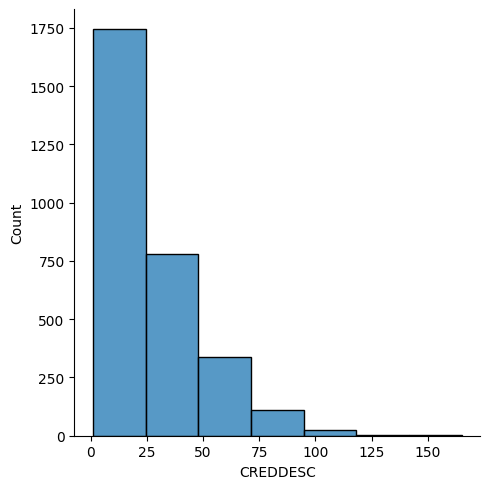

In [141]:
# histogram of how many bachelors degrees are offered
# this should probably be how many universities offer how many undergrad degrees
sns.displot(
    x="CREDDESC",
    binwidth=25,
    data=df_fields_of_study.query("CREDDESC == 'Bachelors Degree'")
    .groupby("INSTNM")
    .count(),
)

<Axes: ylabel='Frequency'>

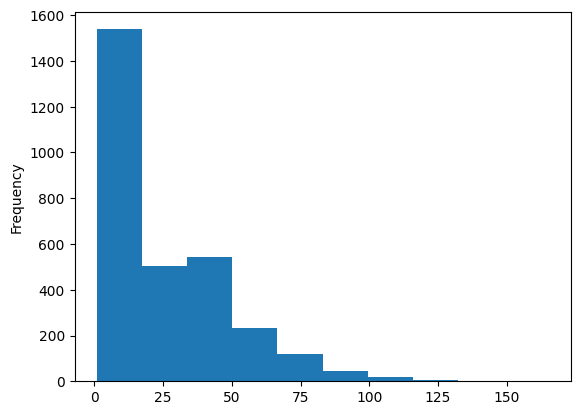

In [142]:
# matplotlib version of the histogram, which is counting the name area of the degree (CIPDESC)
(
    df_fields_of_study.query("CREDDESC == 'Bachelors Degree'")
    .groupby("INSTNM")["CIPDESC"]
    .count()
    .plot(kind="hist")
)

In [143]:
# which universities have the greatest number of bachelors programs?
(
    df_fields_of_study.query("CREDDESC == 'Bachelors Degree'")
    .groupby("INSTNM")["CIPDESC"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)

INSTNM
Westminster College                          165
Pennsylvania State University-Main Campus    141
University of Washington-Seattle Campus      137
Ohio State University-Main Campus            126
Bethel University                            125
Name: CIPDESC, dtype: int64

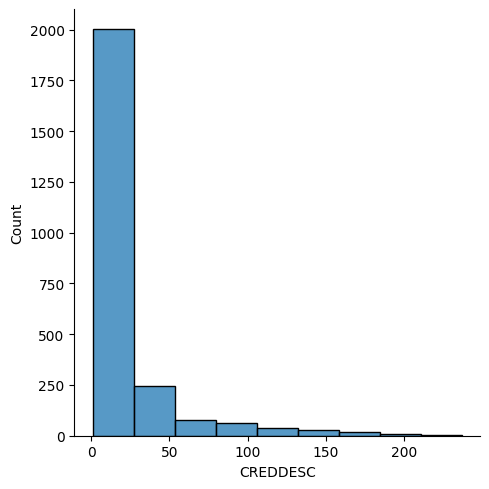

In [144]:
sns.displot(
    x="CREDDESC",
    binwidth=25,
    data=df_fields_of_study.query(
        "CREDDESC.isin(('Doctoral Degree', 'Master\\'s Degree'))"
    )
    .groupby("INSTNM")
    .count(),
)

In [145]:
# which universties offer the greatest number of grad programs?

(
    df_fields_of_study.query("CREDDESC.isin(('Doctoral Degree', 'Master\\'s Degree'))")
    .groupby("INSTNM")["CIPDESC"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)

INSTNM
University of Washington-Seattle Campus      237
Pennsylvania State University-Main Campus    230
New York University                          226
University of Minnesota-Twin Cities          205
Ohio State University-Main Campus            200
Name: CIPDESC, dtype: int64

# Questions (Book Q4)
1. How many universities offer bachelors programs but not graduate programs?
2. How many universities offer graduate programs but no bachelors programs?
3. How many universities offer bachelor's degrees containing `"Computer Science"`?
4. The `CONTROL` field describes the types of institutions in the database. How many of each type offer a computer science program?

In [146]:
# unis with undergrad but no postgrad
with_bachelors = df_fields_of_study.query("CREDDESC == 'Bachelors Degree'")["INSTNM"]
with_grad = df_fields_of_study.query(
    "CREDDESC.isin(('Doctoral Degree', 'Master\\'s Degree'))"
)["INSTNM"]
with_bachelors[~with_bachelors.isin(with_grad)].drop_duplicates().count()

923

In [147]:
# opposite, postgrad but no undergrad
with_grad[~with_grad.isin(with_bachelors)].drop_duplicates().count()

404

In [148]:
# compsci unis
with_compsci = df_fields_of_study.query(
    "CREDDESC == 'Bachelors Degree' and CIPDESC.str.contains('Computer Science')"
)
with_compsci["INSTNM"].drop_duplicates().count()

762

In [149]:
# types of institutions offering computer science
with_compsci.groupby("CONTROL")["INSTNM"].count()

CONTROL
Foreign                 32
Private, for-profit     18
Private, nonprofit     501
Public                 273
Name: INSTNM, dtype: int64

<Axes: title={'center': 'Institution types offering Computer Science undergrad degrees'}>

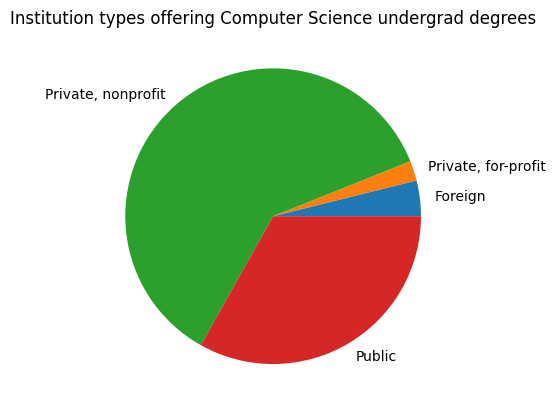

In [150]:
with_compsci.groupby("CONTROL")["INSTNM"].count().plot(
    kind="pie",
    title="Institution types offering Computer Science undergrad degrees",
    ylabel="",
)

In [151]:
# min, max, median, mean TUITIONFEE_OUT for schools in the CS undergrad set
(
    with_compsci.set_index("OPEID6")
    .join(
        # discard all columns that aren't relevant
        df_institutions[["OPEID6", "TUITIONFEE_OUT"]].set_index("OPEID6"),
    )
    .describe()
)

,TUITIONFEE_OUT
count,1139.000000
mean,26996.482002
std,14903.734488
min,3154.000000
25%,13202.500000
50%,24320.000000
75%,37836.000000
max,61671.000000


In [185]:
# tuition for the different CONTROL types of universities, still for CompSci
(
    with_compsci.set_index("OPEID6")
    .join(
        # discard all columns that aren't relevant
        df_institutions[["OPEID6", "TUITIONFEE_OUT"]].set_index("OPEID6"),
    )
    .groupby("CONTROL")
    .describe()
    .dropna()  # "Foreign" has no candicates so results in a bunch of NaN
    .T
)

CONTROL               Private, for-profit  Private, nonprofit        Public
TUITIONFEE_OUT count           136.000000          582.000000    421.000000
               mean          12359.161765        33789.982818  22333.437055
               std            1954.582965        15973.754351   9618.584458
               min            8280.000000         4300.000000   3154.000000
               25%           12054.000000        20260.000000  15636.000000
               50%           12233.000000        34245.000000  21312.000000
               75%           12233.000000        47128.500000  27540.000000
               max           25820.000000        61671.000000  47220.000000

In [153]:
df_institutions[["ADM_RATE", "TUITIONFEE_OUT"]].corr()
# weak negative correlation between admission rate and the tuition fee
# so this could be interpreted as more exclusive schools (lower admission rate)
# tend to have a higher tuition fee
# it could also be interpreted as admissions being relaxed to boost numbers
# and keep costs low

,ADM_RATE,TUITIONFEE_OUT
ADM_RATE,1.000000,-0.309658
TUITIONFEE_OUT,-0.309658,1.000000


In [ ]:
# let's look at this using the CONTROL types as well
(
    df_institutions.set_index("OPEID6")
    .join(df_fields_of_study[["OPEID6", "CONTROL"]].set_index("OPEID6"))[
        ["ADM_RATE", "TUITIONFEE_OUT", "CONTROL"]
    ]
    .groupby("CONTROL")
)

ADM_RATE  TUITIONFEE_OUT
CONTROL                                                     
Private, for-profit ADM_RATE        1.000000        0.104820
                    TUITIONFEE_OUT  0.104820        1.000000
Private, nonprofit  ADM_RATE        1.000000       -0.518200
                    TUITIONFEE_OUT -0.518200        1.000000
Public              ADM_RATE        1.000000       -0.146447
                    TUITIONFEE_OUT -0.146447        1.000000

<Axes: xlabel='TUITIONFEE_OUT', ylabel='ADM_RATE'>

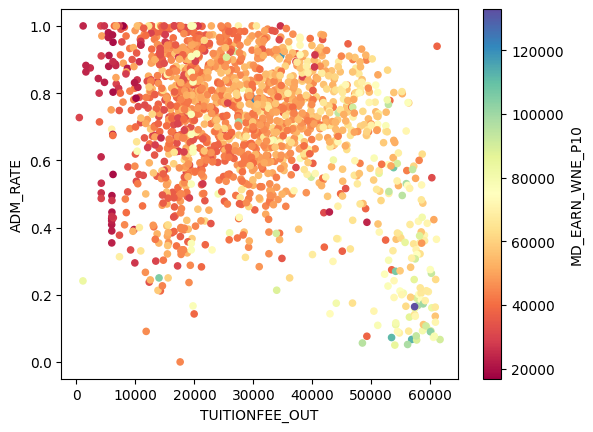

In [155]:
# plot tuition on x, admissions on y, and 10 year earnings as hue
df_institutions.plot(
    kind="scatter",
    x="TUITIONFEE_OUT",
    y="ADM_RATE",
    c="MD_EARN_WNE_P10",
    colormap="Spectral",
)
# pretty much a validation of the selective expensive schools == higher earnings trope

In [156]:
# which unis are in the top 25% tuition fees and also the top 25% of Pell grants (govt subsidy)
df_institutions.query(
    "TUITIONFEE_OUT >= TUITIONFEE_OUT.quantile(0.75) and FTFTPCTPELL >= FTFTPCTPELL.quantile(0.75)"
)[["INSTNM", "CITY", "STABBR"]].sort_values(by="INSTNM")

,INSTNM,CITY,STABBR
5491,Antioch College,Yellow Springs,OH
1206,Berea College,Berea,KY
1930,Berkeley College-Woodland Park,Woodland Park,NJ
1932,Bloomfield College,Bloomfield,NJ
2334,Chowan University,Murfreesboro,NC
1543,Dorsey College,Madison Heights,MI
3758,Dorsey College-Roseville,Roseville,MI
5138,Dorsey College-Saginaw,Saginaw,MI
3734,Dorsey College-Wayne,Wayne,MI
1542,Dorsey School of Business-Madison Heights,Madison Heights,MI


In [157]:
# which unis have a negative average price (receive subsidies) for the lowest income brackets?
df_institutions.query("NPT41_PUB < 0 or NPT41_PRIV < 0")["INSTNM"].count()

12

In [158]:
# proportion that lower income brackets pay compared to the high income bracket for public
# this is just lowest / highest
(df_institutions["NPT41_PUB"] / df_institutions["NPT45_PUB"]).mean() * 100

52.33221766529079

In [159]:
# and for private universities
(df_institutions["NPT41_PRIV"] / df_institutions["NPT45_PRIV"]).mean() * 100

71.4905619436487

In [160]:
df_institutions[["NPT41_PUB", "NPT41_PRIV"]].describe()

,NPT41_PUB,NPT41_PRIV
count,1823.000000,3506.00000
mean,8282.877674,17948.00656
std,4569.992570,7743.82339
min,-3103.000000,-539.00000
25%,5078.500000,13047.25000
50%,7662.000000,17357.50000
75%,10771.500000,22240.75000
max,36000.000000,111962.00000


# Analysing the ROI for universities
1. For which schools in the cheapest 25% do their students have the top 25% of the salaries 10 years after graduation?
2. Again, for private universities
3. Is there a correlation between admission rates and completion rates?
4. 10 years after graduating from what types of schools (public, private, etc) do people earn the greatest, on average?
5. Do people who graduate from "Ivy Plus" (Ivy League + MIT, Stanford, University of Chicago) earn more than the average private university graduate? If so, how much more?
6. Do people studying at universities in particular stats earn more on average after 10 years?

In [161]:
# schools in the cheapest 25% who have students in the top 25% of 10 year salaries
(
    df_institutions.query(
        "NPT4_PUB <= NPT4_PUB.quantile(0.25) and MD_EARN_WNE_P10 > MD_EARN_WNE_P10.quantile(0.75)"
    )[["INSTNM", "CITY", "STABBR"]].sort_values(["STABBR", "CITY"])
)

,INSTNM,CITY,STABBR
203,California State University-Dominguez Hills,Carson,CA
267,De Anza College,Cupertino,CA
208,California State University-Los Angeles,Los Angeles,CA
363,Moorpark College,Moorpark,CA
228,Canada College,Redwood City,CA
450,Skyline College,San Bruno,CA
432,College of San Mateo,San Mateo,CA
652,University of Florida,Gainesville,FL
5563,University of Florida-Online,Gainesville,FL
645,Florida International University,Miami,FL


In [163]:
# now the same for private universities
good_performing_private = df_institutions.query(
    "NPT4_PRIV <= NPT4_PRIV.quantile(0.25) and MD_EARN_WNE_P10 > MD_EARN_WNE_P10.quantile(0.75)"
)[["INSTNM", "CITY", "STABBR"]].sort_values(["STABBR", "CITY"])
good_performing_private
# these all look like they're private, non-profit universities

,INSTNM,CITY,STABBR
4795,Columbia Southern University,Orange Beach,AL
3695,Stanford University,Stanford,CA
4208,Mercy Hospital School of Practical Nursing-Pla...,Miami,FL
842,Brigham Young University-Idaho,Rexburg,ID
895,Graham Hospital School of Nursing,Canton,IL
978,Saint Xavier University,Chicago,IL
1011,Calumet College of Saint Joseph,Whiting,IN
1297,University of Holy Cross,New Orleans,LA
1448,Harvard University,Cambridge,MA
1383,Ner Israel Rabbinical College,Baltimore,MD


In [167]:
# check correlation between admissions and completion rates
df_institutions[["ADM_RATE", "C100_4"]].corr()
# weak negative correlation

,ADM_RATE,C100_4
ADM_RATE,1.000000,-0.336871
C100_4,-0.336871,1.000000


In [ ]:
# let's look at this using the CONTROL types as well
(
    df_institutions.set_index("OPEID6")
    .join(df_fields_of_study[["OPEID6", "CONTROL"]].set_index("OPEID6"))[
        ["ADM_RATE", "C100_4", "CONTROL"]
    ]
    .groupby("CONTROL")
).corr()
# for profit universities show a slight positive correlation, so higher admissions slightly higher graduation
# which is what you'd expect for higher fee institutions

ADM_RATE    C100_4
CONTROL                                         
Private, for-profit ADM_RATE  1.000000  0.195644
                    C100_4    0.195644  1.000000
Private, nonprofit  ADM_RATE  1.000000 -0.498329
                    C100_4   -0.498329  1.000000
Public              ADM_RATE  1.000000 -0.404673
                    C100_4   -0.404673  1.000000

In [170]:
(
    df_institutions.set_index("OPEID6")
    .join(df_fields_of_study[["OPEID6", "CONTROL"]].set_index("OPEID6"))[
        ["TUITIONFEE_OUT", "C100_4", "CONTROL"]
    ]
    .groupby("CONTROL")
).corr()
# much stronger correlation between tuition fees and completion rates for public
# and non-profit, but more weakly correlated for for-profit than admission rates

TUITIONFEE_OUT    C100_4
CONTROL                                                     
Private, for-profit TUITIONFEE_OUT        1.000000  0.139473
                    C100_4                0.139473  1.000000
Private, nonprofit  TUITIONFEE_OUT        1.000000  0.770518
                    C100_4                0.770518  1.000000
Public              TUITIONFEE_OUT        1.000000  0.671018
                    C100_4                0.671018  1.000000

In [171]:
# on average which earnings are expected after 10 years from different types of unis
(
    df_institutions.set_index("OPEID6")
    .join(df_fields_of_study[["OPEID6", "CONTROL"]].set_index("OPEID6"))[
        ["MD_EARN_WNE_P10", "CONTROL"]
    ]
    .groupby("CONTROL")
    .mean()
)
# interesting, private non-profit units do better on average for long term earnings
# and for-profit do the worst - I wonder what the earnings are based off

,MD_EARN_WNE_P10
CONTROL,
"Private, for-profit",38164.132933
"Private, nonprofit",52539.363062
Public,46682.056312


In [175]:
# average earnings for different states
(
    df_institutions.groupby("STABBR")["MD_EARN_WNE_P10"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

STABBR
MA    53234.396226
RI    50432.789474
DC    49081.470588
CT    48662.017857
VT    48383.857143
NY    47584.653199
NH    46540.791667
WA    44594.678161
PA    44265.733083
MN    43821.510204
Name: MD_EARN_WNE_P10, dtype: float64

<Axes: title={'center': 'Average 10 year earnings by state'}, xlabel='US State', ylabel='Average earnings after 10 years'>

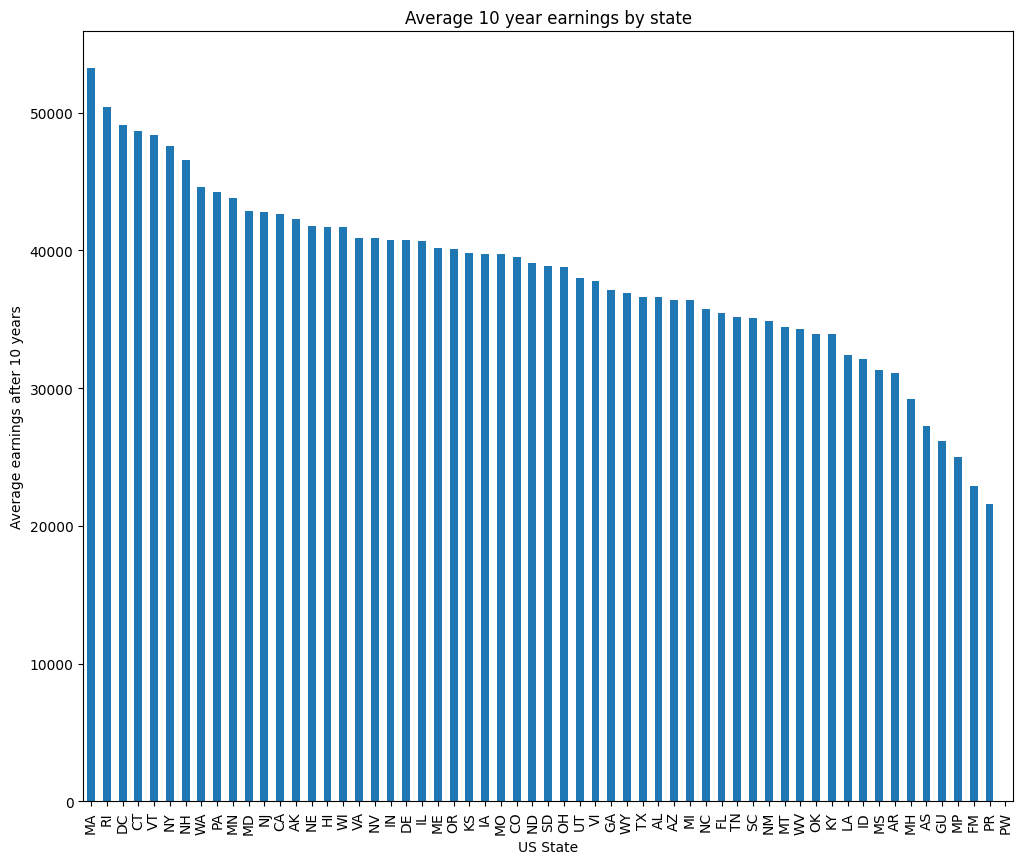

In [181]:
(
    df_institutions.groupby("STABBR")["MD_EARN_WNE_P10"]
    .mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        title="Average 10 year earnings by state",
        xlabel="US State",
        figsize=(12, 10),
    )
)

<Axes: >

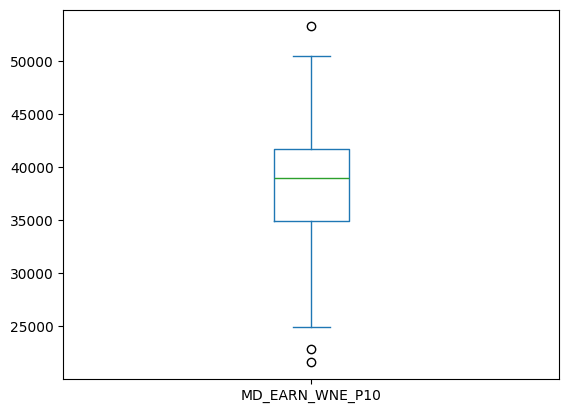

In [184]:
(
    df_institutions.groupby("STABBR")["MD_EARN_WNE_P10"]
    .mean()
    .plot(
        kind="box",
    )
)

In [176]:
# I honestly have no idea what universities are "ivy league", coming from Australia
ivy_plus = [
    "Harvard University",
    "Massachusetts Institute of Technology",
    "Yale University",
    "Columbia University in the City of New York",
    "Brown University",
    "Stanford University",
    "University of Chicago",
    "Dartmouth College",
    "University of Pennsylvania",
    "Cornell University",
    "Princeton University",
]

(
    df_institutions.loc[
        df_institutions["INSTNM"].isin(ivy_plus), "MD_EARN_WNE_P10"
    ].mean()
)


91806.81818181818